# Activity 3: Creating my first CNN
### Activity 3 from chapter 2 of the book Generative Deep Learning by David Foster

In [1]:
# Import statements
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, \
    BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K

from keras.datasets import cifar10

#### Load the data

In [2]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [4]:
x_train[54, 12, 13, 1]

0.36862746

#### Model Architecture

In [5]:
input_layer = Input(shape=(32,32,3))
conv_layer_1 = Conv2D(
    filters = 10,
    kernel_size = (4,4),
    strides = 2,
    padding = 'same'
)(input_layer)

conv_layer_2 = Conv2D(
    filters = 20,
    kernel_size = (3,3),
    strides = 2,
    padding = 'same'
)(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)
output_layer = Dense(units=10, activation='softmax')(flatten_layer)
model = Model(input_layer, output_layer)

W0701 11:06:19.668596 4687775232 deprecation_wrapper.py:119] From /Users/alfredo.leon/opt/miniconda3/envs/gdl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0701 11:06:19.691333 4687775232 deprecation_wrapper.py:119] From /Users/alfredo.leon/opt/miniconda3/envs/gdl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 11:06:19.700598 4687775232 deprecation_wrapper.py:119] From /Users/alfredo.leon/opt/miniconda3/envs/gdl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Actual model with activation layers and regularization
input_layer = Input((32,32,3))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x) # B.A.D -> Batch Normz, Activation Func, Dropout
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

W0701 11:11:52.077974 4687775232 deprecation.py:506] From /Users/alfredo.leon/opt/miniconda3/envs/gdl/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 16, 16, 32)        0         
__________

#### Train the model

In [11]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

W0701 11:14:12.965773 4687775232 deprecation_wrapper.py:119] From /Users/alfredo.leon/opt/miniconda3/envs/gdl/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [12]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data = (x_test, y_test)
)

W0701 11:15:01.643896 4687775232 deprecation.py:323] From /Users/alfredo.leon/opt/miniconda3/envs/gdl/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 115s 2ms/step - loss: 1.5543 - acc: 0.4546 - val_loss: 1.3138 - val_acc: 0.5358
Epoch 2/10
50000/50000 [==============================] - 119s 2ms/step - loss: 1.1401 - acc: 0.5976 - val_loss: 1.3383 - val_acc: 0.5335
Epoch 3/10
50000/50000 [==============================] - 113s 2ms/step - loss: 0.9939 - acc: 0.6522 - val_loss: 1.0023 - val_acc: 0.6508
Epoch 4/10
50000/50000 [==============================] - 119s 2ms/step - loss: 0.9106 - acc: 0.6810 - val_loss: 0.8935 - val_acc: 0.6847
Epoch 5/10
50000/50000 [==============================] - 119s 2ms/step - loss: 0.8498 - acc: 0.7032 - val_loss: 0.9942 - val_acc: 0.6599
Epoch 6/10
50000/50000 [==============================] - 120s 2ms/step - loss: 0.7990 - acc: 0.7199 - val_loss: 0.8324 - val_acc: 0.7125
Epoch 7/10
50000/50000 [==============================] - 122s 2ms/step - loss: 0.7569 - acc: 0.7360 - val_loss: 0.8555 - 

#### Evaluate the model

In [13]:
model.evaluate(x_test, y_test, batch_size=1000)

10000/10000 [==============================] - 4s 396us/step


[0.8842802822589875, 0.6920999944210052]

In [14]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 
                    'dog', 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

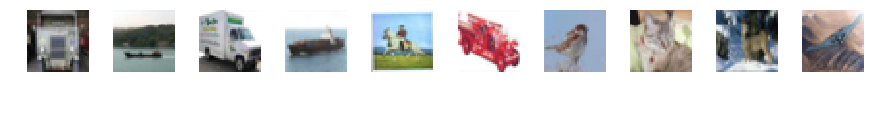

In [16]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)
fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, 
            ha='center', transform=ax.transAxes, color='white')
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', 
            transform=ax.transAxes, color='white')
    ax.imshow(img)
